Importing the needed modules

In [174]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import math

Testing image can be read after an import

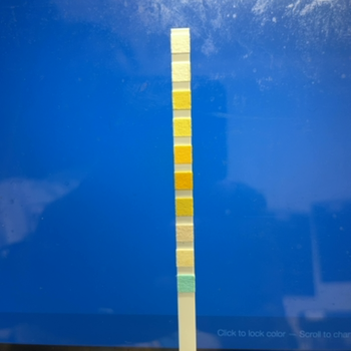

In [47]:
# reading image
img = cv2.imread('/content/1676323628.png')
cv2_imshow(img)

Testing image can be converted to grayscale

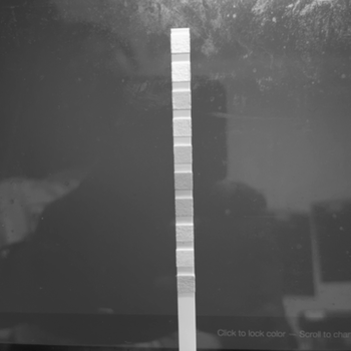

In [48]:
# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

Testing thresholding for recognising if the foreground can be reliable removed from the background of a black and white image

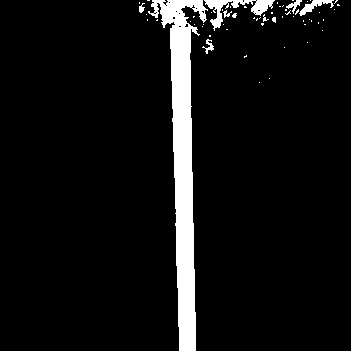

In [49]:
# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(threshold)

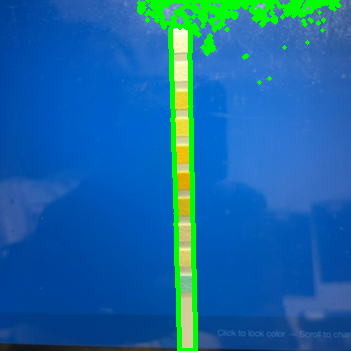

In [50]:
# using a findContours() function
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv.drawContours(img, contours, -1, (0,255,0), 3)

# print(contours)

cv2_imshow(img)

In [14]:
i = 0

In [64]:
# list for storing names of shapes
for contour in contours:
  
    # here we are ignoring first counter because 
    # findcontour function detects whole image as shape
    if i == 0:
        i = 1
        continue
  
    # cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(
        contour, 0.01 * cv2.arcLength(contour, True), True)
      
    # using drawContours() function
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)
  
    # finding center point of shape
    M = cv2.moments(contour)
    x = 0
    y = 0
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])
  
    # putting shape name at center of each shape
    if len(approx) == 3:
        cv2.putText(img, 'Triangle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    elif len(approx) == 4:
        cv2.putText(img, 'Quadrilateral', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    elif len(approx) == 5:
        cv2.putText(img, 'Pentagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    elif len(approx) == 6:
        cv2.putText(img, 'Hexagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    else:
        cv2.putText(img, 'circle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  

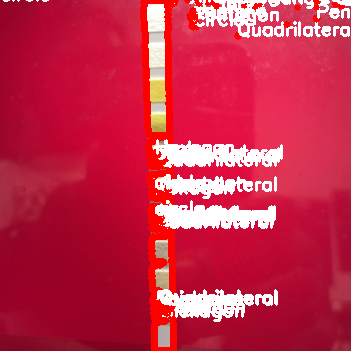

In [62]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# reading image
img = cv2.imread('/content/1676323713.png')

# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
  
# using a findContours() function
contours, _ = cv2.findContours(
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  
i = 0
  
# list for storing names of shapes
for contour in contours:
  
    # here we are ignoring first counter because 
    # findcontour function detects whole image as shape
    if i == 0:
        i = 1
        continue
  
    # cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(
        contour, 0.01 * cv2.arcLength(contour, True), True)
      
    # using drawContours() function
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)
  
    # finding center point of shape
    M = cv2.moments(contour)
    x=0
    y=0
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])
  
    # putting shape name at center of each shape
    if len(approx) == 3:
        cv2.putText(img, 'Triangle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    elif len(approx) == 4:
        cv2.putText(img, 'Quadrilateral', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    elif len(approx) == 5:
        cv2.putText(img, 'Pentagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    elif len(approx) == 6:
        cv2.putText(img, 'Hexagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    else:
        cv2.putText(img, 'circle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
# displaying the image after drawing contours
cv2_imshow(img)
  
cv2.waitKey(0)
cv2.destroyAllWindows()

CROPPING THE IMAGE

The first task is to relaibly crop the dipstick from the background.

Method: 

I will be using OpenCV's cropping alorithm to try to crop the dipstick from the background.
- Will experiment on light background and light backgrounds. 
- Different lighting conditions.


Display all the images

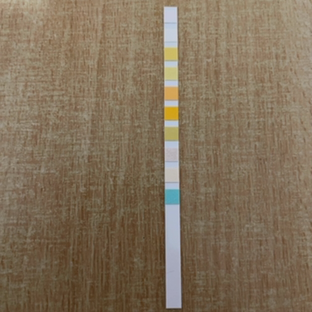

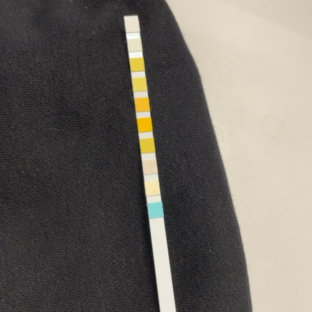

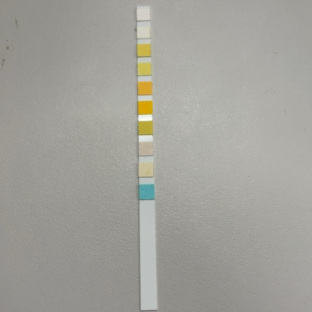

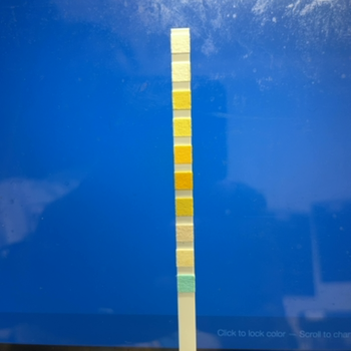

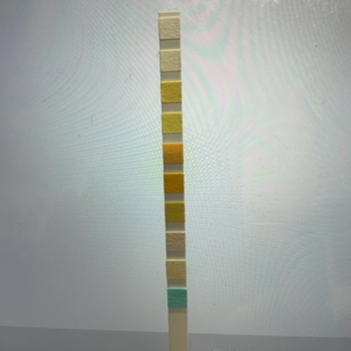

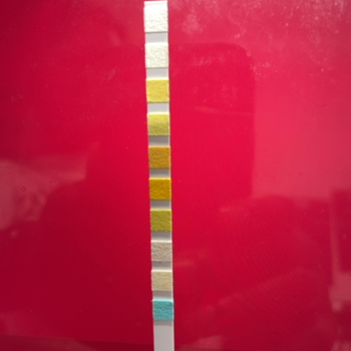

In [63]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


paths = ['/content/1676223304.png', '/content/1676322437.png', '/content/1676322641.png', '/content/1676323676.png', \
         '/content/1676323698.png', '/content/1676323713.png' ]
images = []
for path in paths:
  img = cv2.imread(path) # read the image
  images.append(img)
  cv2_imshow(img) # show the image

Convert all the images to gray scale

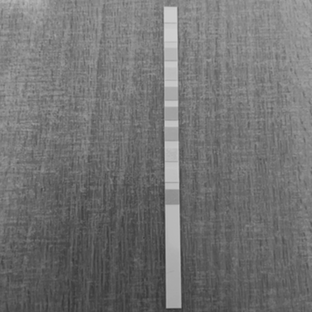

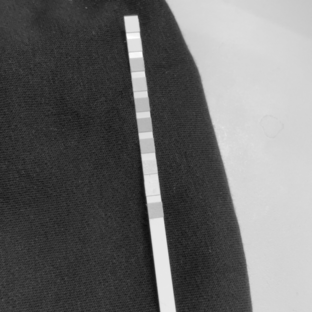

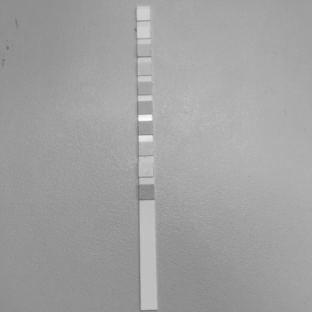

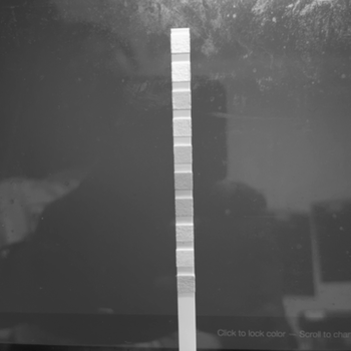

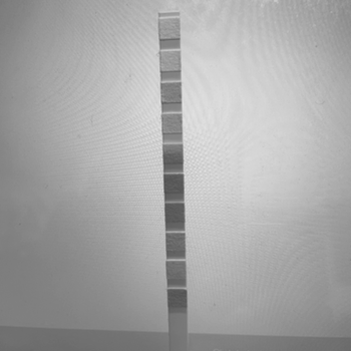

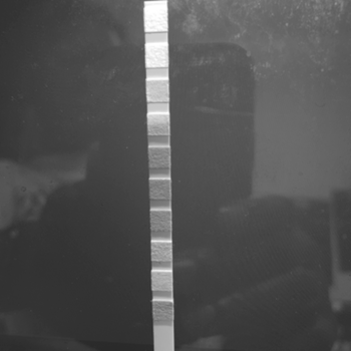

In [20]:
# convert the images to gray scale
gray_images = []
for image in images:
  gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  gray_images.append(gray)
  cv2_imshow(gray)



## OTSU Thresholding

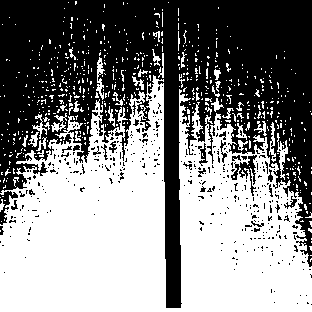

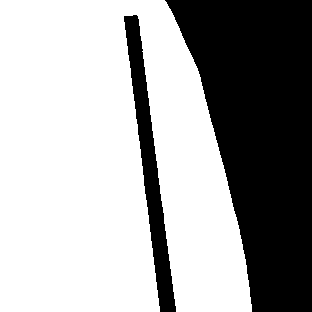

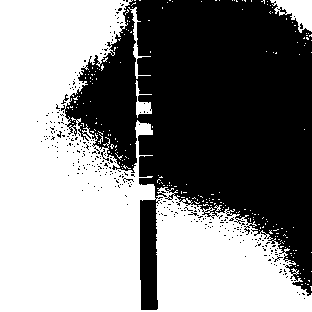

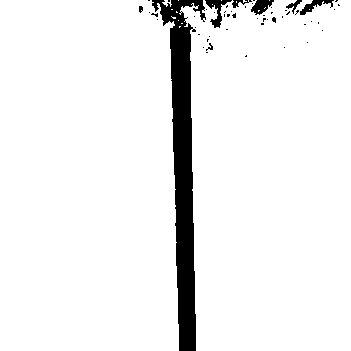

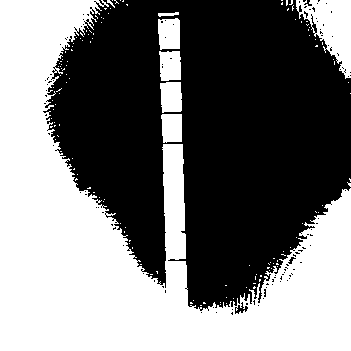

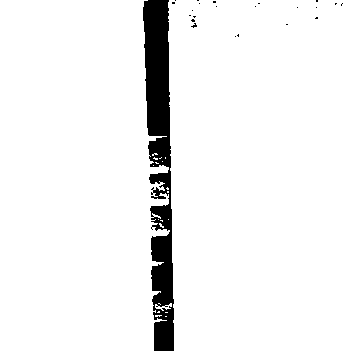

In [22]:
# Use open cv's threshold
for gray_image in gray_images:
  ret, thresh = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  cv2_imshow(thresh)
  

As you can see from above the image on the black background produces the best image. 

There are some worries about the quality of the image that will be produced on the black background. When the background is purely black, smartphone camera overexpose the image and the image 

## ADAPTIVE THRESHOLDING

From OpenCV's website:

In the previous section, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

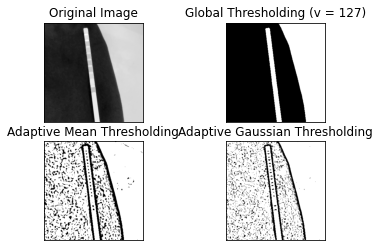

In [23]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/content/1676322437.png',0)

img = cv.medianBlur(img,5)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)

th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

As you can see above, a standard Global Thresholding seems to perform the best on all the images.

## EDGE DETECTION

Canny Edge Detection vs Sobel Edge Detection

Carrying out edge detection using open cvs sobel edge detection.

- Convert the image to grayscale
- Then blur the image
- The apply both algorithm to the blurred image and see


**Blurring**

According to OpenCV, image blurring is achieved by convolving the image in a low pass kernel. Blurring can be useful for removing noise from an image. 

THere are 4 types of blurring provided by opencv, averaging, gaussian blurring, median blurring and bilateral filtering.


  **Bilateral filtering:**

  It is very effective in removing noise from an image and allowing us to detect the edges in the image. Where the Gaussian filter takes the neighbourhood around the pixel and finds its Gaussian weighted average and doesn't consider whether a pixel is an edge or not. 

  Bilateral filtering also takes a Gaussian filter in space, but one more Gaussian filter which is a function of pixel difference. The Gaussian function of space makes sure that only nearby pixels are considered for blurring, while the Gaussian function of intensity difference makes sure that only those pixels with similar intensities to the central pixel are considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.


source:https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html


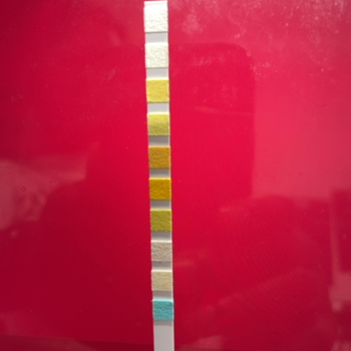

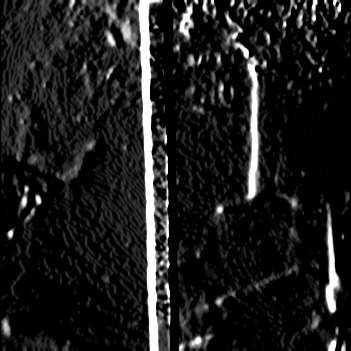

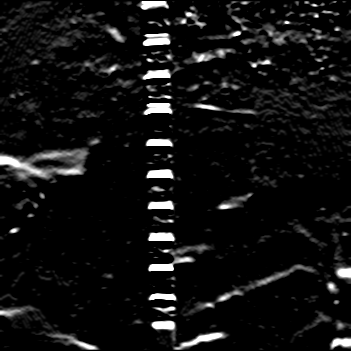

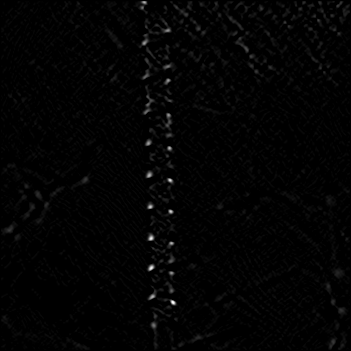

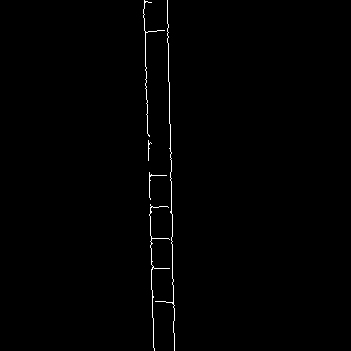

In [75]:
# Read the original image
img = cv2.imread('/content/1676323713.png') 

def edge_detection(img):
  # Display original image
  cv2_imshow(img)
  cv2.waitKey(0)
  
  # Convert to graycsale
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Blur the image for better edge detection
  img_blur = cv2.GaussianBlur(img_gray, (7,7), 0) 
  
  # Sobel Edge Detection
  sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
  sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
  sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

  # Display Sobel Edge Detection Images
  cv2_imshow(sobelx)
  cv2.waitKey(0)
  cv2_imshow(sobely)
  cv2.waitKey(0)
  cv2_imshow(sobelxy)
  cv2.waitKey(0)
  
  # Canny Edge Detection
  edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection

  # Display Canny Edge Detection Image
  cv2_imshow(edges)
  cv2.waitKey(0)
  
  cv2.destroyAllWindows()

edge_detection(img)

As you can see above the canny edge detection algorithm by open cv does a pretty good job of detecting the edges in the image.

Is there a way I can incorporate this into the algorithm?

Maybe use edge detection to segment the application and crop the image.

## CROPPING IMAGE USING THRESHOLDING

Next step, is to figure out how to crop the images received using thresholdinng.

I have attempted that below. The images below are cropped using OTSU's thresholding

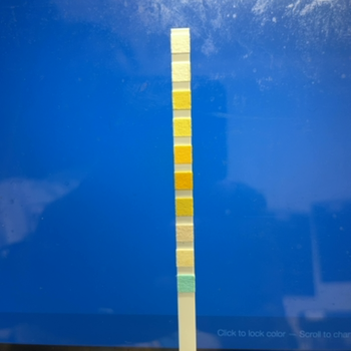

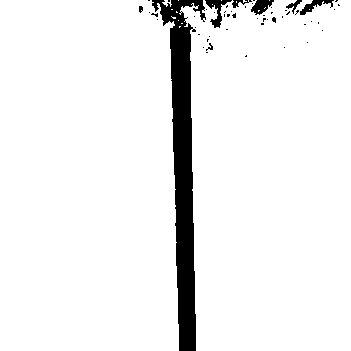

(0, 0, 351, 351)
(0, 0, 351, 351)


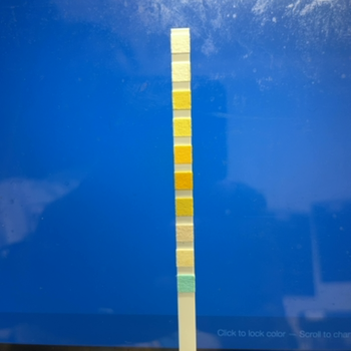

In [90]:
import cv2

img = cv2.imread('/content/1676323695.png')
cv2_imshow(img)
h, w = img.shape[:2]

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


thr = cv2.threshold(gray, 192, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
cv2_imshow(thr)

bbox = cv2.boundingRect(thr)

print(bbox)

x, y, w, h = bbox
print(bbox)

foreground = img[y:y+h, x:x+w]

# print(foreground)

cv2_imshow(foreground)
# cv2.imwrite("foreground.png", foreground)


# image = cv2.imwrite('/content/1676223304.png', thr)




As you can see above, this was a failure. Next I am going to attempt to use PILLOW to crop the image.

# USING PILLOW TO CROP DIPSTICK

Installing the rembg library allows me to remove the background from the images reliably. 

This can also be done by training a model on how to remove the background.

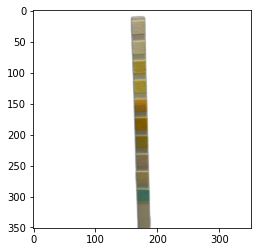

In [102]:
# !pip install rembg
from rembg import remove
from PIL import Image
input_path = '/content/1676323698.png'
output_path = 'output.png'
input = Image.open(input_path)
output = remove(input)
# output.show()
plt.imshow(output)
output.save(output_path)



# COLOUR RECOGNITION

### DECTECT SHAPE IN IMAGE

Try to detect the squares in the image

In [91]:
img = cv2.imread('/content/1676223304.png')
imgGry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ret , thrash = cv2.threshold(imgGry, 0 , 255, cv2.CHAIN_APPROX_NONE)
# thrash = cv2.threshold(gray, 192, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)[1]
# cv2_imshow(thrash)

contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for contour in contours:
  approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
  cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)


# for contour in contours:
#     approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
#     cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
#     x = approx.ravel()[0]
#     y = approx.ravel()[1] - 5

#     if len(approx) == 3:
#         cv2.putText( img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0) )
#     elif len(approx) == 4 :
#         x, y , w, h = cv2.boundingRect(approx)
#         aspectRatio = float(w)/h
#         print(aspectRatio)
#         if aspectRatio >= 0.95 and aspectRatio < 1.05:
#             cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

#         else:
#             cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

#     elif len(approx) == 5 :
#         cv2.putText(img, "pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
#     elif len(approx) == 10 :
#         cv2.putText(img, "star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
#     else:
#         cv2.putText(img, "circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


error: ignored

1


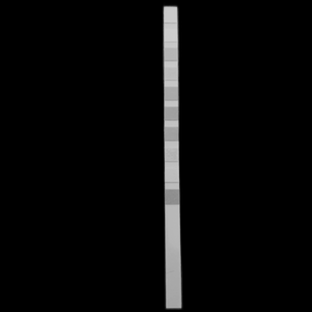

In [ ]:
image = cv2.imread('/content/output.png')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, im = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy  = cv2.findContours(im, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours)

img = cv2.drawContours(img_gray, contours, -1, (0,255,75), 2)
cv2_imshow(img)

# Detecting Squares from the image using opencv

In [104]:
def find_squares(img):
    img = cv2.GaussianBlur(img, (5, 5), 0)
    squares = []
    for gray in cv2.split(img):
        for thrs in range(0, 255, 26):
            if thrs == 0:
                bin = cv2.Canny(gray, 0, 50, apertureSize=5)
                bin = cv2.dilate(bin, None)
            else:
                _retval, bin = cv2.threshold(gray, thrs, 255, cv2.THRESH_BINARY)
            contours, _hierarchy = cv2.findContours(bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
            for cnt in contours:
                cnt_len = cv2.arcLength(cnt, True)
                cnt = cv2.approxPolyDP(cnt, 0.02*cnt_len, True)
                if len(cnt) == 4 and cv2.contourArea(cnt) > 1000 and cv2.isContourConvex(cnt):
                    cnt = cnt.reshape(-1, 2)
                    max_cos = np.max([angle_cos( cnt[i], cnt[(i+1) % 4], cnt[(i+2) % 4] ) for i in range(4)])
                    #print(cnt)
                    a = (cnt[1][1] - cnt[0][1])

                    if max_cos < 0.1 and a < img.shape[0]*0.8:

                        squares.append(cnt)
    return squares

dipstick = cv2.imread('/content/1676323628.png')
squares = find_squares(dipstick)
cv2.drawContours(dipstick, squares, -1, (0, 255, 0), 3)

NameError: ignored

CHAT GPT ANSWER

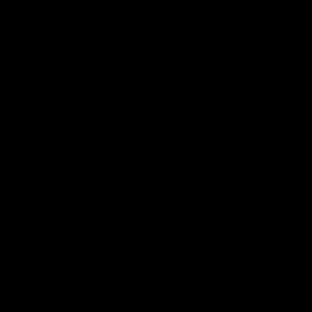

Red pad: 1
Green pad: 0
Blue pad: 0


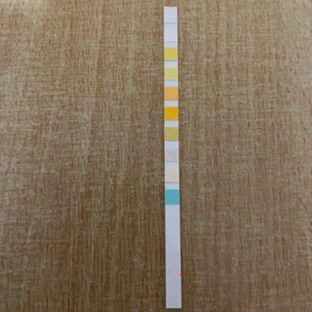

In [126]:
import cv2
import numpy as np

# Load the image from file
img = cv2.imread('/content/1676223304.png')

# Convert the image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the color ranges for the dipstick pads
lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])
lower_green = np.array([50, 50, 50])
upper_green = np.array([70, 255, 255])
lower_blue = np.array([110, 50, 50])
upper_blue = np.array([130, 255, 255])
lower_yellow = np.array([49, 52, 60])
upper_yellow = np.array([49, 80, 49])


# Threshold the image to extract the colors of interest
mask_red = cv2.inRange(hsv, lower_red, upper_red)
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)

cv2_imshow(mask_yellow)


# Find the contours of the colored areas
contours_red, _ = cv2.findContours(mask_red, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_green, _ = cv2.findContours(mask_green, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_blue, _ = cv2.findContours(mask_blue, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_blue, _ = cv2.findContours(mask_yellow, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv2.drawContours(img, contours_red, -1, (0, 0, 255), 2)
cv2.drawContours(img, contours_green, -1, (0, 255, 0), 2)
cv2.drawContours(img, contours_blue, -1, (255, 0, 0), 2)

# Output the results
print("Red pad:", len(contours_red))
print("Green pad:", len(contours_green))
print("Blue pad:", len(contours_blue))

# Display the image with contours
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

From ChatGPT: 

Note that this program assumes that the dipstick is positioned consistently in the image, and that the lighting conditions are relatively consistent across images. If the dipstick is not positioned consistently, or the lighting conditions are variable, additional image processing steps may be necessary to compensate for these factors.



---


**What additional steps should be carried out to compensate for those factors?** 


If the dipstick is not consistently positioned in the image, or if the lighting conditions are variable, the following additional image processing steps may help to compensate for these factors:

Image alignment: 

If the dipstick is not consistently positioned in the image, it may be necessary to align the image to a known reference point. This can be done using feature detection and matching techniques, such as SIFT or SURF. These techniques can detect distinctive features in the image, and match them to features in a reference image to determine the transformation needed to align the two images.

Illumination normalization: 

If the lighting conditions are variable, it may be necessary to normalize the illumination across the image. This can be done using techniques such as histogram equalization or adaptive histogram equalization. These techniques adjust the intensity values of the image to increase the contrast and make the image more consistent across different lighting conditions.

Color calibration: 

If the colors in the image appear differently from the true colors, it may be necessary to calibrate the colors. This can be done using color calibration charts or other color reference images. The image can be compared to the reference image, and a transformation can be calculated to adjust the colors in the image to match the true colors.
By incorporating these additional steps, the image processing algorithm can be made more robust to variations in dipstick positioning and lighting conditions, and provide more accurate color detection results.

Self Organising Mapping

An unsupervised artificial neural network algorithm.



Trying to extract colours on the pads using coordinates

In [130]:
img = cv2.imread('/content/output.png')
img.shape

(351, 351, 3)

In [134]:
im = Image.open('/content/1676223304.png') # Can be many different formats.
pix = im.load()
print(im.size)  # Get the width and hight of the image for iterating over
print(pix[120,10])  # Get the RGBA Value of the a pixel of an image
# Set the RGBA Value of the image (tuple)


(312, 312)
(165, 148, 122, 255)


Extracting the colour on a pad at a specific coordinates.
- Convert image to RGB
- Draw a rectangle around a spacific pad.
- Sample that pad

170 92
[155 132  43]


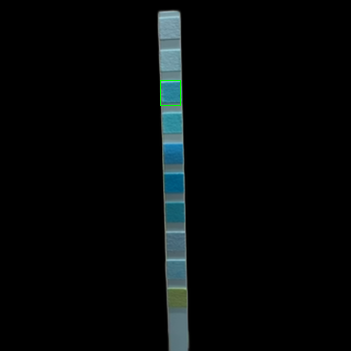

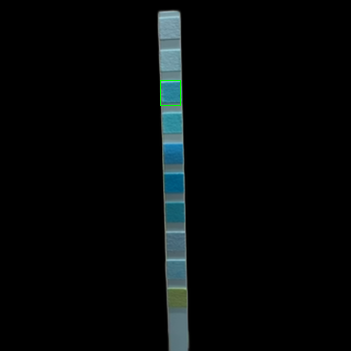

In [227]:
# img = cv2.imread('/content/1676223304.png') # original



img = cv2.imread('/content/output.png') # original
# convert image to rgb
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
x1 = 160
y1 = 80
x2 = 180
y2 = 105

rectangle = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0))

midpoint_x = round((x1+x2)/ 2)
midpoint_y = round((y1+y2) / 2)

print(midpoint_x, midpoint_y)
# cv2.rectangle(img, (midpoint_x, midpoint_y), ((midpoint_x+2), (midpoint_y+2)), (0, 255, 0))

colour = img[midpoint_y,midpoint_x] # row major, like in opencv
print(colour)

cv2_imshow(rectangle)
cv2_imshow(img)

Extracting the colour on a pad at a specific location and comparing it to the reference colours


In [226]:
# reference colours
urobilinogen = [[235, 276, 123], [232,161,148], [232, 147, 144], [230, 123, 124], [227,104,119]]

errors =[]


minimum = -1
min_index = -1

for index, i in enumerate(urobilinogen):
  print(i)
  # Eucledian distance
  ed = abs(i[0] - colour[0]) + abs(i[1] - colour[1]) + abs(i[2] - colour[2])
  
  errors.append(ed)

  if minimum == -1:
    minimum = ed
    index = 0
  
  if ed <= minimum:
    minimum = ed
    min_index = index


# d = abs (R - int (esv. Loc[1, "R'])) + abs (G - int(esv. Loc[1, "f"])) + abs(B - int(csv. Loc[i, "B"1))

print(f'Sampled colour: {colour}')
print(f'Errors: {errors}')
print(f'Minimum error: {minimum}')
print(f'Index of minimum error: {min_index}')

[235, 276, 123]
[232, 161, 148]
[232, 147, 144]
[230, 123, 124]
[227, 104, 119]
Sampled colour: [ 43 132 155]
Errors: [368, 225, 215, 227, 248]
Minimum error: 215
Index of minimum error: 2


As you can see from above, By doing some testing on the urobillinogen test.

I calculated the absolute error in for each of the colours and put the results into an array.

From the first test, we can see that this method is not accurate. The input image was of an unused dipstick and the algorithm returned an index of 1 meaning there is a trace when it should have returned 0.

Further testing will be carried out to improve accuracy. The lighting could br affecting the system right now. May need to convert to HSV and see the effect.

# NEED TO FIND A WAY TO DO IT MORE ACCURATELY: TRY HSV
